<a href="https://colab.research.google.com/github/etalab-ia/ami-ia/blob/master/notebooks/ami_ia_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook NLP

Introduction au NLP avec l'example des avis rendus par la CADA (Comission d'Accès aux Documents Administratifs)
L'objectif de ce notebook est présenter : 
- quelques étapes "classiques" dans la préparation de données textuelles avec le langage de programmation Python
- un exemple d'analyse automatique à travers un modèle d'extraction de topics
- un exemple de modèle prédictif à partir de données textuelles 

La page de data.gouv où l'on peut télécharger les données est ici: https://www.data.gouv.fr/fr/datasets/avis-et-conseils-de-la-cada/ . L'url de téléchargement des données utilisées ici est https://www.data.gouv.fr/fr/datasets/r/93aed7ce-db2f-4982-8127-340562061e4b . 

## Partie 0: Analyses simples du jeu de données 

importation des libraries utiles

In [147]:
# pour la manipulation de jeux de données 
import pandas as pd
import numpy as np

# commandes pour éliminer les warnings 
import warnings
warnings.filterwarnings("ignore")

# pour la dataviz 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Plusieurs possibilités pour lire le jeu de données: 
- (Google Collab) utiliser la fonctionnalité de lecture des fichiers locaux dans Google Collab -> 1ère option
- (hors google collab) le télécharger en local et le lire en pointant vers le chemin d'accès en local -> 2ème option 
- (avec ou sans Google Collab) : lire le fichier directement depuis l'url de téléchargement -> 3ème option 

In [13]:
# 1ère option 
# importer un fichier depuis votre ordinateur local depuis Google Collab 

#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [153]:
# lire le jeu de données en un objet "pandas dataframe"

# 2ème option 
path = '/Users/kimmontalibet/Desktop/datagouv/'
df = pd.read_csv(path + "cada-2020-05-12.csv", sep = ",", header = 0)

# 3ème option 
#df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/93aed7ce-db2f-4982-8127-340562061e4b", sep = ",", header = 0)

Quel est le nombre de lignes et le nombre de colonnes de mon jeu de données ? 

In [154]:
df.shape

(38287, 11)

Quels sont les types des colonnes mon jeu de données? 

In [155]:
df.dtypes

Numéro de dossier       int64
Administration         object
Type                   object
Année                   int64
Séance                 object
Objet                  object
Thème et sous thème    object
Mots clés              object
Sens et motivation     object
Partie                 object
Avis                   object
dtype: object

A quoi ressemble mon jeu de données ? 

In [156]:
df.head()

,Numéro de dossier,Administration,Type,Année,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,Avis
0,19840002,ministre de la défense,Avis,1984,03/03/1984,[Voir avis],"Justice, Ordre Public Et Sécurité/Défense Et D...",Armée,Défavorable/Défense,III,La commission d'accès aux documents administra...
1,19840003,ministre de la défense,Avis,1984,13/12/1984,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Armée,"Irrecevable/Imprécise, Défavorable/Défense, In...",III,La commission d'accès aux documents administra...
2,19850001,"ministre de l'économie, des finances et du budget",Avis,1985,05/12/1985,[Voir avis],"Justice, Ordre Public Et Sécurité/Association,...",NaN,Défavorable,III,La commission d'accès aux documents administra...
3,19860001,directeur départemental du travail et de l'emp...,Conseil,1986,30/01/1986,(voir avis),Travail Et Emploi/Droit Du Travail,"Licenciement, Conditions de travail","Défavorable/Procédure, Sans objet",III,La commission d'accès aux documents administra...
4,19870061,gouverneur de la Banque de France,Avis,1987,02/04/1987,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Banques et assurances,"Défavorable/Sécurité publique, Favorable/Sauf ...",III,La commission d'accès aux documents administra...


On regarde les variables catégorielles: 
- combien de valeurs remplies (count), 
- combien de valeurs uniques / modalités (unique), 
- quelle est la modalité la plus représentée (top), 
- quelle est le nombre de fois où apparait la modalité la plus représentée (freq)

In [20]:
df.describe(include = np.object)

,Administration,Type,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,Avis
count,38286,38287,38287,38270,38206,33125,38271,36059,38286
unique,12850,3,569,35334,828,3615,3094,4,37519
top,Direction générale des finances publiques (DGFIP),Avis,31/12/2017,"Communication, par envoi postal ou par courrie...",Travail Et Emploi / Emploi Public,Marché public,Favorable,III,"Monsieur X, pour l’association Regards citoyen..."
freq,1255,35562,1450,556,3025,1838,11407,31429,132


### Visualisation du nombre d'avis par année

on crée une dataframe avec une ligne par année, la colonne count donne le nombre d'avis par année 


In [163]:
df["count"] = 1
dfg = df.groupby("Année").agg("sum").reset_index()

Text(0.5, 1.0, "Nombre d'avis CADA par année")

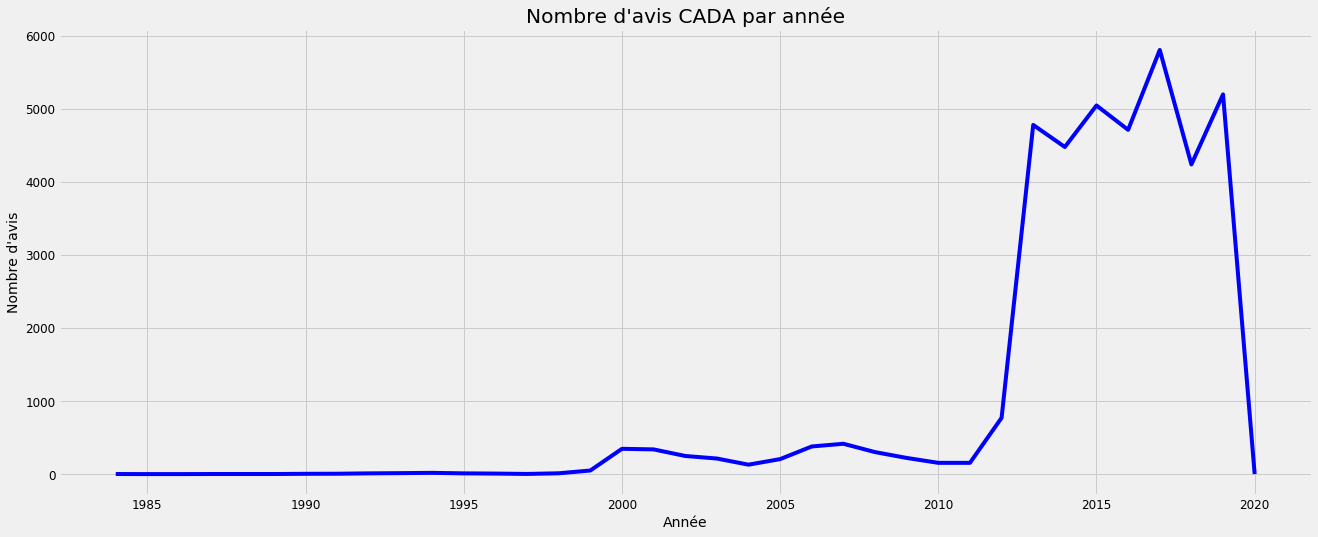

In [164]:
plt.figure(figsize=(20, 8))
plt.plot(dfg['Année'], dfg['count'], 'b-')
plt.xlabel('Année'); plt.ylabel("Nombre d'avis"); plt.title("Nombre d'avis CADA par année")

On remarque qu'il y a très peu d'avais avant 2012, et donc que la majorité des avis sont pour la période 2012-2020
Commbien d'avis sont compris dans cette période 2012-2020? 

In [165]:
print("Nombre d'avis dans 20012-2020 :  {}".format(len(df[df["Année"].isin(range(2012, 2020))])))
print("Proportion d'avis dans 20012-2020 :  {}".format(len(df[df["Année"].isin(range(2012, 2020))])/len(df)))

Nombre d'avis dans 20012-2020 :  35024
Proportion d'avis dans 20012-2020 :  0.9147752500848852


Text(0.5, 1.0, "Nombre d'avis CADA par année - Période 2012-2020")

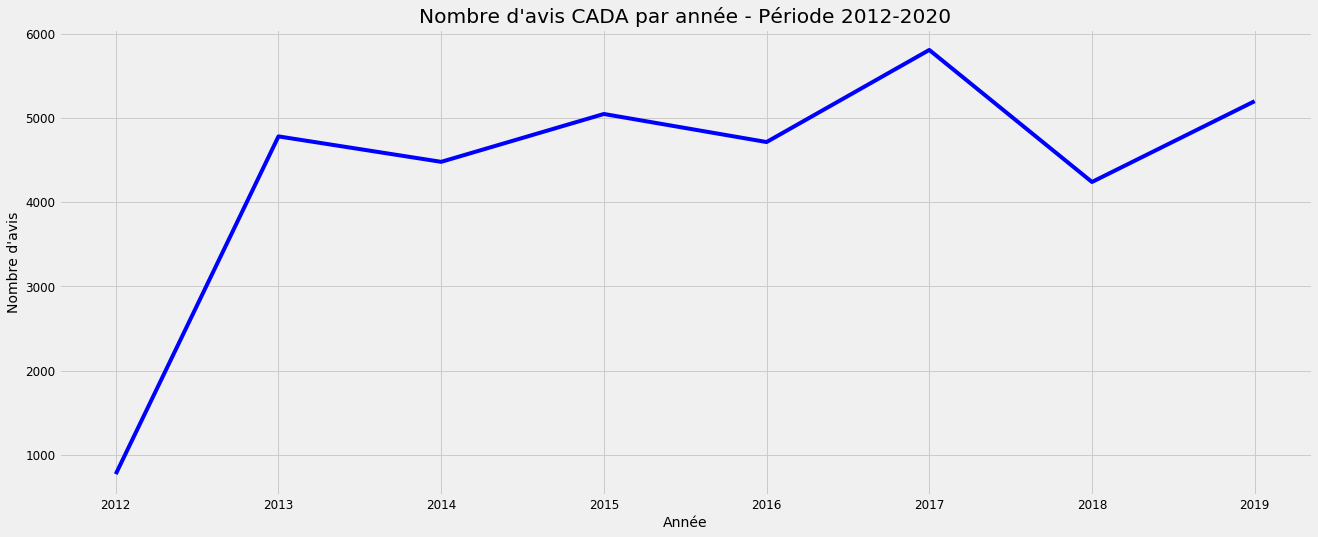

In [166]:
plt.figure(figsize=(20, 8))
plt.plot(dfg[dfg["Année"].isin(range(2012, 2020))]['Année'], dfg[dfg["Année"].isin(range(2012, 2020))]['count'], 'b-')

plt.xlabel('Année'); plt.ylabel("Nombre d'avis"); plt.title("Nombre d'avis CADA par année - Période 2012-2020")

# Partie 1 : manipulations de données textuelles basiques


importation des librairies NLP 

In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kimmontalibet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


on étudie ici les textes des avis, 
on supprime les lignes pour lesquelles l'avis n'est pas renseigné

In [168]:
df = df.dropna(subset = ["Avis"]) 
print(df.shape)

(38286, 12)


### Tokenization 
Chaque avis (dans la colonne "Avis") est une chaîne de caractères, il faut donc lui appliquer un certain nombre d'opération afin de pouvoir la traiter algorithmiquement. Une première étape, la tokenization, consiste en découper la chaine de caractères en "tokens". Pour cela, on utilise des fonctions prédéfinies de la librairies NLTK. 
Il existe plusieurs métodes de tokenization, et le choix de la méthode va dépendre de l'objectif de l'étude. 
Les métodes les plus classques sont: 
- la tokenisation en phrases (sentence tokenization en anglais)
- la tokenisation en mots (word tokenization en anglais)
On crée ici deux nouvelles colonnes, correspondant à ces deux modes de tokenization 


In [256]:
df["avis_sent_token"] = df["Avis"].map(sent_tokenize)
df["avis_word_token"] = df["Avis"].map(lambda x : word_tokenize(x.replace("'", " "))) # on remplace les appostrophes par un espaces
# car la tokenization avec la fonction "word_tokenize" de nltk ne les sépare pas autrement 

on regarde ce que ça donne : 

In [257]:
numero_ligne = 1 # changer le nombre afin de visualiser différentes lignes du jeu de données 
print("Texte initial de l'avis")
print(df.loc[numero_ligne, "Avis"])
print("\n")
print("Texte tokenizé en phrases")
print("Nombre de phrases : {}".format(len(df.loc[numero_ligne, "avis_sent_token"])))
print(df.loc[numero_ligne, "avis_sent_token"])
print("\n")
print("Texte tokenizé en mots")
print("Nombre de mots : {}".format(len(df.loc[numero_ligne, "avis_word_token"])))

print(df.loc[numero_ligne, "avis_word_token"])


Texte initial de l'avis
La commission d'accès aux documents administratifs a examiné dans sa séance du 13 décembre 1984 la demande dont vous l'avez saisie par lettre du 31 octobre 1984.

La commission a estimé que la communication des analyses des rejets provenant du Centre d'Etude du Bouchet à Vert-le-Petit pourrait permettre la divulgation des activités du Centre et des procédures techniques employées et serait par là de nature à porter atteinte au secret de la défense nationale. Il en va de même des « plans de secours », qui sont indissociables des activités pratiquées au Centre.

En conséquence, et en application des dispositions de l'article 6 de le loi du 17 juillet 1978, la commission a rendu un avis défavorable sur ces deux points de votre demande.

Sur les autres points, celle-ci a été rejetée comme irrecevable ; elle est en effet formulée en termes trop généraux et constitue plus une demande de renseignement qu'une demande d'un document administratif précis.


Texte tokenizé 

# on calcule des métriques simples : 
- le nombre de caractères par avis
- le nombre de phrases par avis 
- le nombre de mots par avis

In [180]:
df["nb_char"] = df["Avis"].map(len)
df["nb_sent_token"] = df["avis_sent_token"].map(len)
df["nb_word_token"] = df["avis_word_token"].map(len)

on regarde la moyenne, l'écart type, les quartiles de ces métriques

In [181]:
df[["nb_char", "nb_word_token", "nb_sent_token" ]].describe()

,nb_char,nb_word_token,nb_sent_token
count,38286.000000,38286.000000,38286.000000
mean,2334.749099,416.808886,7.162879
std,1844.640813,332.160084,5.424005
min,38.000000,6.000000,1.000000
25%,1048.000000,187.000000,4.000000
50%,1725.000000,305.000000,5.000000
75%,3036.750000,537.000000,9.000000
max,37462.000000,7041.000000,152.000000


une fois qu'on a divisé notre texte en une liste de mots, on peut faire plusieurs opérations de netoyage 
- retirer la ponctuation 
- mettre tous les caractères en minuscules (peut aussi être fait avant la tokenization)
- enlever les stopwords (mots sans apport pour comprendre le sens de la phrase)
- lemmatiser ou stemmer afin de regrouper deux termes proches en un terme unique : 
    - personnes -> personne
    - conduisent, conduis, etc.. -> conduire
    
Ces étapes sont réalisées dans la partie 2 : extraction de topics

on peut ensuite "vectoriser ces listes de mots afin de les rendre intelligible par une machine, 
il existe plusieurs méthode de vectoriser 
    - la matrice de term frequency 
    - la matrice tf-idf
    - les word embeddings 

Ressource: un article (en anglais) bien fait qui montre comment calculer la matrice TF et TF-IDF "form scratch: cratch : https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3

Pour calculer automatiquement ces matrices, il existe différentes librairies. On utilise ici la librairie sklearn


In [189]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### La matrice de term frequency 

![term_doc_matrix.png](./images/term_doc_matrix.png)

Chaque document est composé d'un certains nombre de mots. L'ensemble de tous les mots distincts présents dans les documents consititue le vocabulaire du corpus (corpus = ensemble des documents). 
La term-frequency matrix est une matrice avec une ligne par document et une colonne par mot du vocabulaire. 
Pour chaque document, les colonnes donne le nombre de fois où le mot apparait dans le document. 
C'est l'approche qu'on appelle souvent "bag of words" ou sac de mots en français. 

Ci-dessous on calcule la matrice Term frequency à l'aide de la librairie sklearn, qui comprend un modèle "CountVectorizer", qui'il faut entraîner sur le corpus de données (la liste des avis). Une fois le modèle entrainé, on l'applique (avec la métode transform) sur le même corpus de données. 
Un paramètre utile au modèle CountVectorizer est "min_df", qui correspond au minumum de fois où un mot doit apparaitre dans le corpus afin d'être pris en compte dans la matrice. Il est par défaut à 1, mais en l'augmentant, on peut réduire considérablement le nomnbre de colonnes de la matrice et donc se débarrasser des termes qui apparaissent trop peu. 

In [216]:
vect = CountVectorizer(min_df = 15).fit(df["Avis"])
tf_matrix = vect.transform(df["Avis"])
print("TF-Matrix:\n{}".format(repr(tf_matrix)))

TF-Matrix:
<38286x9354 sparse matrix of type '<class 'numpy.int64'>'
	with 6172343 stored elements in Compressed Sparse Row format>


In [236]:
feature_names = vect.get_feature_names()
print("Nombre de features: {}".format(len(feature_names)))
print("Les 20 premières features:\n{}".format(feature_names[:20]))


Nombre de features: 9354
Les 20 premières features:
['00', '000', '0001', '001', '002', '003', '004', '006', '008', '01', '011', '018', '02', '02235', '02655', '03', '033', '04', '05', '06']


Pour visualiser la matrice, on la transforme en dataframe: 
    

In [203]:
tf_dataframe = pd.SparseDataFrame(tf_matrix, columns = feature_names).fillna(0)

In [237]:
tf_dataframe.head()

,00,000,0001,001,002,003,004,006,008,01,...,événement,événements,êtes,être,île,îles,îlot,îlots,œuvre,œuvres
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


On observe ce que l'on appelle une matrice sparse, ce qui signifie que la majorité des termes sont à 0.
On voit par exemple que le document trois à une fois le mot "être". 
Pour vérifier, on regarde la phrase du document 3. 

In [249]:
print(df.loc[3, "Avis"])

La commission d'accès aux documents administratifs a examiné dans sa séance du 30 janvier 1986 votre demande de conseil.

La commission a émis un avis défavorable à la communication des courriers échangés entre le salarié et la direction départementale du travail et de l'emploi au sujet du préavis de démission.

La communication de ces documents à l'entreprise en vue de les produire devant la juridiction prud'homale pourrait, en effet, être de nature à porter atteinte au déroulement de la procédure juridictionnelle en cours. 



In [258]:
print([x.lower() for x in df.loc[3, "avis_word_token"]])

['la', 'commission', 'd', 'accès', 'aux', 'documents', 'administratifs', 'a', 'examiné', 'dans', 'sa', 'séance', 'du', '30', 'janvier', '1986', 'votre', 'demande', 'de', 'conseil', '.', 'la', 'commission', 'a', 'émis', 'un', 'avis', 'défavorable', 'à', 'la', 'communication', 'des', 'courriers', 'échangés', 'entre', 'le', 'salarié', 'et', 'la', 'direction', 'départementale', 'du', 'travail', 'et', 'de', 'l', 'emploi', 'au', 'sujet', 'du', 'préavis', 'de', 'démission', '.', 'la', 'communication', 'de', 'ces', 'documents', 'à', 'l', 'entreprise', 'en', 'vue', 'de', 'les', 'produire', 'devant', 'la', 'juridiction', 'prud', 'homale', 'pourrait', ',', 'en', 'effet', ',', 'être', 'de', 'nature', 'à', 'porter', 'atteinte', 'au', 'déroulement', 'de', 'la', 'procédure', 'juridictionnelle', 'en', 'cours', '.']


Pour ce même document, on peut vérifier que, sur la 3ème ligne de la TF matrice correpondant à l'avis ci-dessous, les termes non nuls correspondent à ceux du document: 

In [263]:
termes_non_nuls = [col for col in tf_dataframe.loc[3,].index if tf_dataframe.loc[3,col]!=0]
print("les termes non nuls ligne 3 sont : ", termes_non_nuls)
print("les termes non nuls dans la matrice qui ne sont pas dans les word token : ", 
      set(termes_non_nuls) - set([x.lower() for x in df.loc[3, "avis_word_token"]]))
print("les termes dans les ans les word token qui ne sont pas dans les termes non nuls de la matrice : ", 
      set([x.lower() for x in df.loc[3, "avis_word_token"]]) - set(termes_non_nuls))

les termes non nuls ligne 3 sont :  ['1986', '30', 'accès', 'administratifs', 'atteinte', 'au', 'aux', 'avis', 'ces', 'commission', 'communication', 'conseil', 'courriers', 'cours', 'dans', 'de', 'demande', 'des', 'devant', 'direction', 'documents', 'du', 'défavorable', 'démission', 'départementale', 'déroulement', 'effet', 'emploi', 'en', 'entre', 'entreprise', 'et', 'examiné', 'janvier', 'juridiction', 'juridictionnelle', 'la', 'le', 'les', 'nature', 'porter', 'pourrait', 'procédure', 'produire', 'prud', 'sa', 'salarié', 'sujet', 'séance', 'travail', 'un', 'votre', 'vue', 'échangés', 'émis', 'être']
les termes non nuls dans la matrice qui ne sont pas dans les word token :  set()
les termes dans les ans les word token qui ne sont pas dans les termes non nuls de la matrice :  {'homale', 'l', 'a', '.', 'préavis', ',', 'à', 'd'}


### La matrice tf-idf

![tfidf_matrix.png](./images/tfidf_matrix.png)

La matrice TF-IDF est très similaire dans son principe à la matrice TF. Elle a le même format: une ligne par document et une colonne par mot du vocabulaire. Chaque "case" de la matrice sera calculée à partir de la case la matrice TF, mais sera pondérée par l'IDF (inverse document frequency). Cette pondération permet de prendre en compte la fréquence d'occurence d'un terme dans l'ensemble des documents (le corpus). L'idée derrière cette pondération est qu'un terme qui apparait dans un très grand nombre de document n'apporte pas beaucoup d'information pour décrire un document en particulier. Par exemple, dans notre cas, le mot "avis" apparait dans quasiment tous nos documents, il aura donc une fréquence d'apparition dans le corpus élevé et donc un IDF (son inverse) faible. 

Pour résumer, pour un mot donné d'un document donné, le TF-IDF: 

- augmente avec le nombre d'occurrences du mot dans le document
- diminue avec le nombre d'occirrences du mot dans le corpus


In [265]:
vect2 = TfidfVectorizer(min_df = 15).fit(df["Avis"])
tfidf_matrix = vect2.transform(df["Avis"])
print("TF-Matrix:\n{}".format(repr(tf_matrix)))

TF-Matrix:
<38286x9354 sparse matrix of type '<class 'numpy.float64'>'
	with 6172343 stored elements in Compressed Sparse Row format>


In [266]:
feature_names = vect2.get_feature_names()
print("Nombre de features: {}".format(len(feature_names)))
print("Les 20 premières features:\n{}".format(feature_names[:20]))

Nombre de features: 9354
Les 20 premières features:
['00', '000', '0001', '001', '002', '003', '004', '006', '008', '01', '011', '018', '02', '02235', '02655', '03', '033', '04', '05', '06']


Sans surprise, on obtient les mêmes features qu'avec la matrice TF. Regardons mainteant quelques lignes de cette matrice: 

In [267]:
tfidf_dataframe = pd.SparseDataFrame(tfidf_matrix, columns = feature_names).fillna(0)

In [268]:
tfidf_dataframe.head()

,00,000,0001,001,002,003,004,006,008,01,...,événement,événements,êtes,être,île,îles,îlot,îlots,œuvre,œuvres
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.070411,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.021706,0.0,0.0,0.0,0.0,0.0,0.0


Ici on voit que le terme "être" est encore non nul pour les document 3 et 4, mais nous avons des nombres décimals au lieu de nombres entiers. 

\begin{align}
 {\mathrm {tfidf_{{i,j}}}}={\mathrm {tf_{{i,j}}}}\cdot {\mathrm {idf_{{i}}}} \\
 {\mathrm {tfidf_{{être,3}}}} = 1\cdot {\mathrm {idf_{{être}}}} =1\cdot 0.070411 \\
\end{align}

On en déduit que: 
\begin{align}
 {\mathrm {idf_{{être}}}} = 0.070411 \\
\end{align}

Définition de l'IDF:  
\begin{align}
 {\mathrm {idf_{{i,j}}}} = {\mathrm {log_{{10}}}} \\
\end{align}

In [288]:
import math
len(df)/math.pow(10, 0.070411)

32555.84671586084

In [273]:
len(tfidf_dataframe[tfidf_dataframe["être"]>0])

14389

### Exemple de word embeddings of word2vec

A propos de word2vec: développé par une équipe de recherche de Google (article de 2013 disponible ici https://arxiv.org/abs/1301.3781), word2vec est un algorithme permettant de reprénter chaque mot dans un espace vectoriel à n dimensions (généralement n est fixé dans une valeur comprise entre 100 et 400). Les vecteurs des différents mots sont "appris" à l'aide d'un réseau de neurone artificiel. Ces vecteurs, appelés "word embeddings", permettent: 
- de rendre compte des proximités des mots dans le langage naturel (deux mots proches dans le langage, médecin et hopitaux, seront proches dans l'espace vectoriel) 
- de traduire certaines proprités linguistiques du langage naturel en propriétés mathématiques (cf. exemples dans illustration ci-dessous)



![word2vec.png](./images/word2vec.png)

Entrainement du modèle à partir du texte des avis Cada. Les paramètres à fixer sont: 
- size: la taille de l'espace vectoriel (le nombre de dimensions de chaque vecteur)

In [138]:
sentences = df["avis_word_token"].tolist()
from gensim.models import Word2Vec
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

exemple de vecteur pour un mot donné (vous pouvez changer le mot entre guillements et voir les variations des vecteurs)

In [184]:
model.wv['avis']

array([ 3.208701  ,  1.2001978 ,  0.9631643 ,  3.135135  ,  0.19943693,
        0.835203  , -3.2388248 ,  0.5518299 ,  1.0958376 ,  0.04891345,
       -5.2012563 ,  0.05518902,  1.0110785 ,  3.0651872 , -2.220354  ,
        1.9727267 ,  0.22784466,  2.3178163 ,  1.0423992 , -0.54918605,
       -0.11753737, -0.9626078 , -2.8740926 ,  1.1849428 ,  3.2807899 ,
       -2.615599  ,  1.2137442 , -0.16939296, -3.3420463 ,  2.3324075 ,
        0.11869113, -1.4656217 , -1.4988983 , -1.7943109 ,  2.361743  ,
       -0.9900683 ,  0.07967577, -3.608413  ,  1.9248564 , -1.7616553 ,
        1.2592736 ,  0.20968436,  0.80333155,  1.0737084 ,  3.0309446 ,
        1.1651824 ,  0.5777337 ,  1.4316745 , -1.15157   , -2.2022707 ,
        0.2308007 ,  1.5686148 ,  0.07331307, -0.01666031,  2.7159548 ,
       -2.4429178 , -0.68058413, -0.97934747, -3.1835635 , -5.7991824 ,
        1.7146726 ,  0.5837122 ,  1.1788157 , -0.16770494,  0.18653537,
        0.44645214,  0.36560717, -1.4757261 , -0.7566272 , -3.71

quelques exemples de calculs des mots les plus similaires, en utilisant la fonction méthode "most_similar"

In [139]:
model.most_similar("médecin")

[('généraliste', 0.655626118183136),
 ('agréé', 0.6517902612686157),
 ('prescripteur', 0.6218041181564331),
 ('intermédiaire', 0.6169997453689575),
 ('désigne', 0.6065273284912109),
 ('spécialistes', 0.5890629887580872),
 ('régulateur', 0.5599677562713623),
 ('docteur', 0.5592317581176758),
 ('traitant', 0.5321307182312012),
 ('spécialiste', 0.48233020305633545)]

In [140]:
model.most_similar("maire")

[('préfète', 0.7589961290359497),
 ('préfet', 0.7407832145690918),
 ('sceaux', 0.5662443041801453),
 ('académie', 0.5592095255851746),
 ('ministre', 0.5444050431251526),
 ('président', 0.5424714684486389),
 ('présidente', 0.5273807048797607),
 ('recteur', 0.5181554555892944),
 ('directeur', 0.48822686076164246),
 ('garde', 0.4639958143234253)]

In [145]:
model.most_similar("demande")

[('demandée', 0.38057392835617065),
 ('obtenir', 0.3669607639312744),
 ('sollicitée', 0.3607199490070343),
 ('intéressée', 0.35437801480293274),
 ('demandé', 0.33897343277931213),
 ('demander', 0.332382470369339),
 ('reposent', 0.3322491943836212),
 ('documents', 0.3318790793418884),
 ('sollicités', 0.3279246687889099),
 ('invoquant', 0.32424890995025635)]

# Partie 2 : topic extraction (non supervisé)


## Un algorithme d'extraction de topiques: LDA (Latent Dirichlet Allocation) 

### ressource : article très pédagogique (en anglais) dont on s'inspire ici https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc 

### A quoi sert cet algorithme?
 
LDA est un algorithme d'extraction de topics. A partir d'un corpus de documents, il permet de : 
- définir un nombre de topics (un topic est caractérisé par une liste de mots)
- attribuer à chaque document un ou des topics de la liste de topics trouvés par l'algorithme 



![illustration_LDA.png](./images/illustration_LDA.png)

In [217]:
# Etape 0 : importation de la librairie avec l'algorithme 
#!pip install gensim si ce n'est pas déjà fait 
import nltk
nltk.download('stopwords')
from gensim import models
from gensim.models import Phrases
from gensim import corpora
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimmontalibet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Etape 1 :préparation et nettoyage des données textuelles 

- tokenization 
- supression de la ponctuation (pour certains cas d'usage, il peut cependant être utile de garder la ponctuation)


Pour la tokenisation, nous l'avons déjà calculée dans la partie 1 (les tokens sont dans la colonne "avis_word_token". 
On supprime la ponctuation avec la commande ci-desous

In [220]:
# on supprime les tokens avec la ponctuation et on mets tous les mots en minuscule 
df["avis_word_token"] = df["avis_word_token"].map(lambda list_word: [word.lower()  for word in list_word if word.isalpha()])

On supprime les stopwords (les mots très courants et qui n'apporte pas d'information spécifique pour caractériser le thème du document)
Pour cela, on utilise une liste prédéfinie de stopwords de la librairie nltk, que l'on complète avec un certain nombre de stopwords. 


In [222]:
# création de la liste de stopwords
custom_stopwords = ["a", "dont", "madame", "monsieur", "peut", "dès", "lors", "être", "ce",
                    "ces", "cet", "cette", "comme", "ainsi", "si"]
stopwords_fr = stopwords.words('french') + custom_stopwords
print(len(stopwords_fr))
#print(stopwords_fr)

# on enlève les stopwords
df["avis_word_token"] = df["avis_word_token"].map(lambda list_word: [word for word in list_word if word not in stopwords_fr])


172


On regarde ce que ça donne (différence entre notre document initial et la liste des tokens "netoyés"). 
Vous pouvez changer le numero_doc (modifier le chiffre après le = ) et exécuter la cellule pour visualiser un autre document du corpus

In [223]:
numero_doc = 0

print("Document initial")
print(df.loc[numero_doc, "Avis"])
print("\n")
print("Document tokénisé")
print(df.loc[numero_doc, "avis_word_token"])
print("\n")
print("Nombre de token dans le doc :{}".format(len(df.loc[numero_doc, "avis_word_token"])))

Document initial
La commission d'accès aux documents administratifs a examiné dans sa séance du 3 mars 1984 la demande dont vous l'avez saisie par lettre du 21 décembre 1983.

La commission a émis un avis défavorable à la communication du dossier d'enquête relatif au refus de votre admission en qualité d'élève-officier de réserve interprète et du chiffre de la Marine, au motif qu'elle porterait atteinte au secret de la défense nationale, exception prévue par l'article 6 de la loi du 17 juillet 1978.


Document tokénisé
['commission', 'accès', 'documents', 'administratifs', 'examiné', 'séance', 'mars', 'demande', 'saisie', 'lettre', 'décembre', 'commission', 'émis', 'avis', 'défavorable', 'communication', 'dossier', 'enquête', 'relatif', 'refus', 'admission', 'qualité', 'réserve', 'interprète', 'chiffre', 'marine', 'motif', 'porterait', 'atteinte', 'secret', 'défense', 'nationale', 'exception', 'prévue', 'article', 'loi', 'juillet']


Nombre de token dans le doc :37


#### Etape 2: Entrainement de l'algorithme 

Dans l'étape ci-dessous, nous allons, à partir de notre liste de tokens netoyés, créer des bigrammes. Les bigrammes sont des paires de mots, qui peuvent être porteurs de sens et qui sont donc utile pour le topic extraction. 


In [292]:
# création des tokens avec bigrammes et trigrammes 

tokens = df['avis_word_token'].tolist()
bigram_model = Phrases(tokens)
tokens = list(bigram_model[tokens])

Entrainement du modèle après avoir constitué: 
- le dictionnaire des mots du corpus 
- le corpus au format spécique du modèle LDA de gensim 

In [234]:

dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]



# les inputs : le corpus de documents tokenizé et le dictionnaire 
# (liste des mots apparaissant dans le dictionnaire)

np.random.seed(123456)
num_topics = 15
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 3min 7s, sys: 12 s, total: 3min 19s
Wall time: 1min 55s


#### Etape 3 : Visualisation des topics 

Dans un premier temps, on peut visualiser les topics de façon très "brute" sous forme de listes de termes qui caractérisent chaque topic. L'interprétation de ces topics demande une réfléxion "humaine" pour les rendre intelligibles. 

In [235]:
# avec 15 topics 
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.022*"point" + 0.017*"document" + 0.013*"relations_entre" + 0.010*"suite" + 0.009*"réponse" + 0.008*"points" + 0.008*"droit" + 0.008*"avis" + 0.008*"agissant" + 0.008*"ministre"

1: 0.031*"relations_entre" + 0.023*"personne" + 0.022*"mentions" + 0.022*"communicables" + 0.018*"porterait_atteinte" + 0.018*"estime" + 0.017*"préjudice" + 0.016*"privée" + 0.016*"communicable" + 0.015*"sécurité"

2: 0.035*"droit" + 0.022*"dossier" + 0.021*"qualité" + 0.020*"médical" + 0.016*"santé_publique" + 0.015*"dossier_médical" + 0.014*"informations_médicales" + 0.014*"défunt" + 0.014*"demandeur" + 0.014*"personne_décédée"

3: 0.025*"relations_entre" + 0.023*"maire" + 0.020*"fait" + 0.019*"toute_personne" + 0.017*"communicables" + 0.014*"commune" + 0.014*"émet_donc" + 0.013*"estime" + 0.010*"articles" + 0.010*"sous_réserve"

4: 0.039*"dossier" + 0.027*"relations_entre" + 0.019*"communicables" + 0.018*"droit" + 0.015*"administratifs" + 0.015*"dispositions" + 0.014*"sécurité_sociale" + 0.013*"procédur

#### Etape 4 : Attribution des topics aux documents 


In [227]:
# pour un document
print(lda_model[corpus[0]])

# pour tous les documents, on crée une colonne topic number 
df["topic_list"] = [lda_model[i] for i in corpus]
# la commande ci dessus nous permet, pour chaque document, d'obtenir une liste de topics avec les probabilités associées 
# que chaque document appartienne 
df["main_topic"] = df["topic_list"].map(lambda list_topic: list_topic[0][0])
df["main_topic_proba"] = df["topic_list"].map(lambda list_topic: list_topic[0][1])

[(3, 0.06815649), (4, 0.505667), (10, 0.17610063), (12, 0.24633542)]


In [228]:
df.head()

,Numéro de dossier,Administration,Type,Année,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,Avis,count,avis_sent_token,avis_word_token,nb_char,nb_sent_token,nb_word_token,topic_list,main_topic,main_topic_proba
0,19840002,ministre de la défense,Avis,1984,03/03/1984,[Voir avis],"Justice, Ordre Public Et Sécurité/Défense Et D...",Armée,Défavorable/Défense,III,La commission d'accès aux documents administra...,1,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",487,2,85,"[(3, 0.06808352), (4, 0.5057026), (10, 0.17612...",3,0.068084
1,19840003,ministre de la défense,Avis,1984,13/12/1984,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Armée,"Irrecevable/Imprécise, Défavorable/Défense, In...",III,La commission d'accès aux documents administra...,1,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",958,5,166,"[(0, 0.1254243), (3, 0.14432055), (9, 0.169096...",0,0.125424
2,19850001,"ministre de l'économie, des finances et du budget",Avis,1985,05/12/1985,[Voir avis],"Justice, Ordre Public Et Sécurité/Association,...",NaN,Défavorable,III,La commission d'accès aux documents administra...,1,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",787,3,135,"[(0, 0.15807939), (4, 0.05286399), (7, 0.11249...",0,0.158079
3,19860001,directeur départemental du travail et de l'emp...,Conseil,1986,30/01/1986,(voir avis),Travail Et Emploi/Droit Du Travail,"Licenciement, Conditions de travail","Défavorable/Procédure, Sans objet",III,La commission d'accès aux documents administra...,1,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",532,3,88,"[(3, 0.21685626), (4, 0.13340728), (12, 0.6454...",3,0.216856
4,19870061,gouverneur de la Banque de France,Avis,1987,02/04/1987,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Banques et assurances,"Défavorable/Sécurité publique, Favorable/Sauf ...",III,La commission d'accès aux documents administra...,1,[La commission d'accès aux documents administr...,"[commission, accès, documents, administratifs,...",1821,6,332,"[(0, 0.2535904), (4, 0.2392163), (7, 0.0244689...",0,0.253590


In [298]:
df["nombre_documents"] = 1
df_topic = df.groupby(["main_topic"])["nombre_documents"].count().sort_values(ascending = False).reset_index()
df_topic

,main_topic,nombre_documents
0,0,26676
1,3,4962
2,4,2216
3,1,2194
4,2,1584
5,5,399
6,6,114
7,7,74
8,9,38
9,10,24


#### Etape 5 : Eventuellement retour à l'étape 1 (en modifiant les étapes de netoyages) et 2 (en testant différents paramètres, avec en particulier le nombre de topics)


#### Etape 6: Visualisation interactive des topics avec la librairie pyLDAvis


In [232]:

%matplotlib inline
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim


/Users/kimmontalibet/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [233]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# Partie 3 (pour aller plus loin) :  prédiction du sens de la décision à partir du texte de l'avis 

In [46]:
# première étape: simplifier la colonne "sens et motivation" en un petit nombre de catégorie
df = df.dropna(subset = ["Sens et motivation"]) # on supprime les colonnes qui n'ont pas de valeur pour sens et motivation

# on 
df["sens_token"] = df["Sens et motivation"].map(lambda x: word_tokenize(x.lower().replace("'", " ").replace("/", " ")))


In [47]:
df["nb_tokens_motivation"] = df["sens_token"].map(len)

In [48]:
df["nb_tokens_motivation"].describe()

count    38271.000000
mean         4.047373
std          3.886343
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         49.000000
Name: nb_tokens_motivation, dtype: float64

In [49]:
# on cherche les tokens les plus représentés: 
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vect = CountVectorizer()
vect.fit(df["Sens et motivation"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [51]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))
dict_vocabulary = vect.vocabulary_

Vocabulary size: 101
Vocabulary content:
 {'défavorable': 31, 'défense': 32, 'irrecevable': 51, 'imprécise': 44, 'incompétence': 47, 'renseignement': 83, 'procédure': 73, 'sans': 86, 'objet': 65, 'sécurité': 92, 'publique': 81, 'favorable': 41, 'sauf': 87, 'préparatoire': 79, 'secret': 88, 'abusive': 1, 'vie': 97, 'privée': 72, 'commercial': 15, 'industriel': 48, 'judiciaire': 52, 'cnil': 14, 'loi': 57, 'spéciale': 91, 'mandat': 61, 'juridictionnel': 53, 'inexistant': 49, 'déliberation': 33, 'communiqué': 17, 'diplomatie': 25, 'privé': 71, 'refus': 82, 'non': 64, 'établi': 99, 'abonnement': 0, 'motivation': 63, 'inachevé': 45, 'appréciation': 3, 'comportement': 18, 'établissement': 100, 'de': 21, 'document': 27, 'si': 90, 'vous': 98, 'produisez': 74, 'un': 95, 'la': 55, 'personne': 69, 'concernée': 20, 'mal': 60, 'dirigée': 26, 'délibération': 34, 'hors': 43, 'champ': 13, 'détruit': 36, 'fiscal': 42, 'douanier': 30, 'avis': 10, 'ce': 12, 'archives': 4, 'préalable': 77, 'article': 5, 'a

In [83]:
def sens_categorie(x): 
    if "défavorable" in x: 
        return "defavorable"
    elif "favorable" in x: 
        return "favorable"
    elif "incompétence" in x: 
        return "incompetence"
    elif "irrecevable" in x: 
        return "incompetence"
    elif ("sans" in x) and ("objet" in x):
        return "sans_objet"
    else: 
        return "autre"
    
df["sens_categorie"] = df["sens_token"].map(sens_categorie)

In [137]:
df["sens_categorie"].value_counts()

favorable       22739
sans_objet       7128
defavorable      5055
incompetence     3349
Name: sens_categorie, dtype: int64

In [ ]:
# model prediction using 
# - term frequency matrix from text of avis
# - tf-idf from the text of avis

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [99]:
df["text"] = df["avis_word_token"].map(lambda x: " ".join(x))

In [100]:
# split train / test data 
text_train, text_test, y_train, y_test = train_test_split(df["text"], df["sens_categorie"], test_size = 0.2, random_state = 42)


In [ ]:
# First : tf matrix 

In [108]:
vect = CountVectorizer(min_df = 10).fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<30616x8972 sparse matrix of type '<class 'numpy.int64'>'
	with 3622222 stored elements in Compressed Sparse Row format>


In [110]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 8972
First 20 features:
['aa', 'aadecaa', 'ab', 'abandon', 'abandonné', 'abandonnée', 'abandonnés', 'abattage', 'abbaye', 'abbé', 'abf', 'abidjan', 'abonnement', 'abonnements', 'abonné', 'abonnés', 'abord', 'abords', 'abouti', 'aboutir']
Every 2000th feature:
['aa', 'conteste', 'images', 'pluvial', 'susmentionnés']


In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.77


In [115]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 12, 14, 16, 20, 30, 40]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



Best cross-validation score: 0.80
Best parameters:  {'alpha': 20}


In [116]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.81


In [ ]:
# Second : tf-idfmatrix 

In [132]:
vect = TfidfVectorizer(min_df = 15).fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<30616x7478 sparse matrix of type '<class 'numpy.float64'>'
	with 3604683 stored elements in Compressed Sparse Row format>


In [133]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 7478
First 20 features:
['aadecaa', 'ab', 'abandon', 'abandonné', 'abandonnée', 'abattage', 'abonnement', 'abonnés', 'abord', 'abords', 'abouti', 'aboutir', 'aboutissant', 'abri', 'abrogation', 'abrogeant', 'abrogé', 'absence', 'absences', 'absents']
Every 2000th feature:
['aadecaa', 'directive', 'lyon', 'règles']


In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.79


In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 1, 10, 12, 14, 16, 20, 30, 40]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



Best cross-validation score: 0.79
Best parameters:  {'alpha': 0.8}


In [136]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.79
